<h1 align="center"><font size="5">Machine Learning Course Final Project</font></h1>

In this project, it is required to build a notebook with classifier to predict whether a loan case will be paid off or not.

Given a historical dataset from previous loan applications, it is required to clean the data, and to apply different classification algorithm on the data. It is expected to use four algorithms to build your models: k-Nearest Neighbour, Decision Tree, Support Vector Machine, and Logistic Regression.
        
The results is reported as the accuracy of each classifier, using the metrics which are applicable, including Jaccard index, F1-score, and LogLoass.

### First to load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

The loan dataset can be found in the following Url. For this project, it is loaded from a CSV file.

In [2]:
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


### Randomly split our data into training and testing data using the function train_test_split. 

In [20]:
# df.head()

In [21]:
y_data = df['loan_status']

In [22]:
x_data = df.drop(['loan_status','effective_date','due_date','education'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 52
number of training samples: 294


# Classification 

Use the training set to build an accurate model. Then use the test set to report the accuracy of the model
using the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- Can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- Should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- Should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Classifier implementing the k-nearest neighbors vote.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Training to start the algorithm with k=4 for now:

In [25]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

Use the model to predict the test set:

In [26]:
yhat = neigh.predict(x_test)
#yhat[0:5]

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [27]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9807692307692307


Calculate the accuracy of KNN for different Ks.

In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.98076923, 0.98076923, 0.98076923, 0.98076923,
       0.98076923, 1.        , 1.        , 1.        ])

Plot model accuracy for Different number of Neighbors

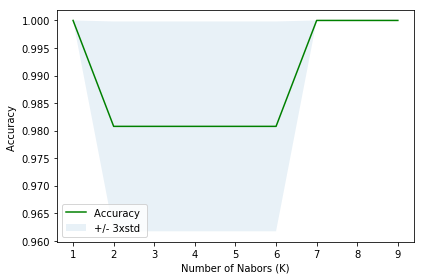

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


### jaccard index for accuracy:

In [31]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

### F1_score from sklearn library for accuracy

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

1.0

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

We will first create an instance of the DecisionTreeClassifier called loanTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [34]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
loanTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [36]:
predTree = loanTree.predict(x_test)

Print out predTree and y_test if you want to visually compare the prediction to the actual values.

In [37]:
print (predTree [0:5])
print (y_test [0:5])

['COLLECTION' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION']
307    COLLECTION
343    COLLECTION
292    COLLECTION
102       PAIDOFF
294    COLLECTION
Name: loan_status, dtype: object


Let's import metrics from sklearn and check the accuracy of our model.

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


### jaccard index for accuracy:

In [39]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

### F1_score from sklearn library for accuracy

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

1.0

# Support Vector Machine

The SVM offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The function used for this transformation is RBF (Radial Basis Function).

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

/Users/larrywu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [42]:
yhat = clf.predict(x_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

You can also easily use the __f1_score__ from sklearn library

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6857142857142856

### jaccard index for accuracy:

In [45]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7692307692307693

### F1_score from sklearn library for accuracy

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6857142857142856

# Logistic Regression

## Modeling (Logistic Regression with Scikit-learn)

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Now we can predict using our test set:

In [48]:
yhat = LR.predict(x_test)
# yhat

Predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [49]:
yhat_prob = LR.predict_proba(x_test)
# yhat_prob

## Evaluation

### jaccard index for accuracy:

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [50]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9615384615384616

### F1_score from sklearn library for accuracy

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9615384615384616

## log loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [52]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.10383500353543032

# Model Evaluation Summary Report

In [56]:
data_evaluation = [["KNN",1.0,1.0,"NA"],["Decision Tree",1.0,1.0,"NA"],["SVM",0.7692,0.6857,"NA"],["LongisticRegression",0.9615,0.9615,"0.1017"]]
df_evaluation = pd.DataFrame(data_evaluation, columns = ["Algorithm","Jaccard","F1-score","Logloss"])
df_evaluation


,Algorithm,Jaccard,F1-score,Logloss
0,KNN,1.0000,1.0000,NA
1,Decision Tree,1.0000,1.0000,NA
2,SVM,0.7692,0.6857,NA
3,LongisticRegression,0.9615,0.9615,0.1017


## Conclusion:

### Both KNN and Decision Tree clustering methods are very good clustering methods, with accuracy rate at 1.0 based on Jacard and F1-score evaluation methods. 